# PREDICTING LOAN DEFAULTS

## TABLE OF CONTENTS
0. [Introduction](#0.-Introduction)
1. [Dependencies and Libraries](#1.-Dependencies-and-Libraries)
2. [Loading the data](#2.-Loading-the-data)
3. [Basic Information of the Dataset](#3.-Basic-Information-of-the-Dataset)  
 
4. [Data Visiualization](#4.-Data-Visiualization)


5. [Data Cleaning](#5.-Data-Cleaning)


   
6. [Feature Engeniering](#6.-Feature-Engeniering)

    
   
7. [Building Models](#7.-Building-Models)

      7.1 [Logistic Regression](#7.1-Logistic-Regression)
     
      7.2 [Decision Tree Classifier](#7.2-Decision-Tree-Classifier)
     
      7.3 [KNeighbors Classifier](#7.3-KNeighbors-Classifier)
     
      7.4 [AdaBoost Classifier](#7.4-AdaBoost-Classifier)
     
      7.5 [Gradient Boosting Classifier](#7.5-Gradient-Boosting-Classifier)
     
      7.6 [Bagging Classifier](#7.6-Bagging-Classifier)
      
      7.7 [Random Forest classifier](#7.7-Random-Forest-classifier)
     
8. [Model Comparison](#8.-Model-Comparison)
9. [Using the Best Model for Predictions](#9.-Using-the-Best-Model-for-Predictions)
     
     

## 0. Introduction

This project analyses a large dataset available on Kaggle.com. The goal of the project is to use some machine learning algorithms along with information provided by a client at the time of a loan application to predict whether or not they will default on the Loan. 



## 1. Dependencies and Libraries

In [112]:
import pandas as pd #for data frame for date processing
import seaborn as sb #for plotting
import numpy as np #for making arrays 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split model into test and strain data
#from sklearn import svm #support vector machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score #used to evaluate the model how it perform on the data set
#pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the data

The following table shows the description of all the features used to make predictions.

In [2]:
Cd = pd.read_csv("columns_description.csv")
Columns_description = Cd.drop(columns={'Unnamed: 0','Table', 'Special'}, axis=1)
Columns_description.head(300)

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


In [3]:
data=pd.read_csv("application_data.csv")

## 3. Basic Information of the Dataset

#### 3.1 Quick Look of the dataset(5 first rows) 

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.2 Shape of the dataset

In [5]:
#number of rows and columns
data.shape

(307511, 122)

#### 3.3 Information about variable datatypes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
data.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'], dtype='object')

In [8]:
data.select_dtypes(include='number').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=106)

#### 3.4 Descriptive Statistics of the dataset

In [9]:
#Descriptive statistics
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## 4. Data Cleaning

##### 4.1 Check for Duplicates

In [10]:
#Call drop_Duplicates on Dataframe to remove duplicates and assign it back to dataframe
data = data.drop_duplicates()

In [11]:
#checking again number of rows before removing duplicates
data.shape

(307511, 122)

There were no duplicates in the dataset.

#### 4.2 Check and remove Null Values

In [12]:
# of missing values in each column
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
#Checking the percentage of null data in each variable
round(data.isna().sum()/len(data)*100,5).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87230
COMMONAREA_AVG                  69.87230
COMMONAREA_MODE                 69.87230
NONLIVINGAPARTMENTS_MODE        69.43296
NONLIVINGAPARTMENTS_AVG         69.43296
NONLIVINGAPARTMENTS_MEDI        69.43296
FONDKAPREMONT_MODE              68.38617
LIVINGAPARTMENTS_MODE           68.35495
LIVINGAPARTMENTS_AVG            68.35495
LIVINGAPARTMENTS_MEDI           68.35495
FLOORSMIN_AVG                   67.84863
FLOORSMIN_MODE                  67.84863
FLOORSMIN_MEDI                  67.84863
YEARS_BUILD_MEDI                66.49778
YEARS_BUILD_MODE                66.49778
YEARS_BUILD_AVG                 66.49778
OWN_CAR_AGE                     65.99081
LANDAREA_MEDI                   59.37674
LANDAREA_MODE                   59.37674
LANDAREA_AVG                    59.37674
BASEMENTAREA_MEDI               58.51596
BASEMENTAREA_AVG                58.51596
BASEMENTAREA_MODE               58.51596
EXT_SOURCE_1                    56.38107
NONLIVINGAREA_MO

A significant number of columns have nearly half null values. We are going to drop them.

In [14]:
#Dropping all the columns with more than 50% null values
data.drop(columns=data.columns[(data.isna().sum()/len(data)*100 > 50)],inplace=True)

In [15]:
#Checking the percentage of null data in each variable
round(data.isna().sum()/len(data)*100,5).sort_values(ascending=False)

FLOORSMAX_AVG                   49.76082
FLOORSMAX_MODE                  49.76082
FLOORSMAX_MEDI                  49.76082
YEARS_BEGINEXPLUATATION_AVG     48.78102
YEARS_BEGINEXPLUATATION_MODE    48.78102
YEARS_BEGINEXPLUATATION_MEDI    48.78102
TOTALAREA_MODE                  48.26852
EMERGENCYSTATE_MODE             47.39830
OCCUPATION_TYPE                 31.34555
EXT_SOURCE_3                    19.82531
AMT_REQ_CREDIT_BUREAU_YEAR      13.50163
AMT_REQ_CREDIT_BUREAU_HOUR      13.50163
AMT_REQ_CREDIT_BUREAU_DAY       13.50163
AMT_REQ_CREDIT_BUREAU_WEEK      13.50163
AMT_REQ_CREDIT_BUREAU_MON       13.50163
AMT_REQ_CREDIT_BUREAU_QRT       13.50163
NAME_TYPE_SUITE                  0.42015
DEF_30_CNT_SOCIAL_CIRCLE         0.33202
OBS_60_CNT_SOCIAL_CIRCLE         0.33202
DEF_60_CNT_SOCIAL_CIRCLE         0.33202
OBS_30_CNT_SOCIAL_CIRCLE         0.33202
EXT_SOURCE_2                     0.21463
AMT_GOODS_PRICE                  0.09040
AMT_ANNUITY                      0.00390
CNT_FAM_MEMBERS 

In [16]:
#Dropping columns that we believe will have little to no impact on whether or not a loan defaults.
data.drop(columns=['CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], inplace=True)

In [17]:
data.shape

(307511, 55)

In [18]:
data.select_dtypes(include='number').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

In [19]:
#Checking of missing values in each column of the new dataset
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE                  96391
REGION_RATING_CLIENT                 0
WEEKDAY_APPR_PROCESS_STAR

We need to handle null values in 17 columns.

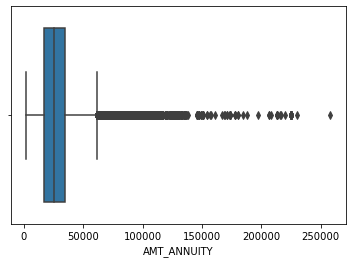

In [20]:
#Checking for any outliers in the numerical column AMT_ANNUITY using a box plot
sb.boxplot(data=data,x='AMT_ANNUITY')
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median. Note a significant amount of data are outliers. So we must proceed with caution with this features. 

In [21]:
data['AMT_ANNUITY'].fillna(value=data['AMT_ANNUITY'].median(),inplace=True)
data['AMT_ANNUITY'].isna().sum()

0

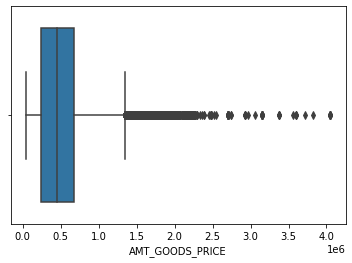

In [22]:
#Checking for any outliers in the numerical column AMT_GOODS_PRICE using a box plot
sb.boxplot(data=data,x='AMT_GOODS_PRICE')
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median. Note a significant amount of data are outliers. So we must proceed with caution with this features. 

In [23]:
data['AMT_GOODS_PRICE'].fillna(value=data['AMT_GOODS_PRICE'].median(),inplace=True)
data['AMT_GOODS_PRICE'].isna().sum()

0

In [24]:
#Handling missing values in the categorical variable NAME_TYPE_SUITE.
data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Since the most common category is "Unaccompanied", we may replace the missing values by that category.

In [25]:
Un = data['NAME_TYPE_SUITE'].value_counts().index[0]
print(Un)
data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE'].fillna(Un)
data['NAME_TYPE_SUITE'].isna().sum()

Unaccompanied


0

In [26]:
#Handling missing values in the categorical variable OCCUPATION_TYPE.
data['OCCUPATION_TYPE'].value_counts() 

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Since the most common category is "Laborers", we may replace the missing values by that category.

In [27]:
Lab = data['OCCUPATION_TYPE'].value_counts().index[0]
print(Lab)
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna(Lab)
data['OCCUPATION_TYPE'].isna().sum()

Laborers


0

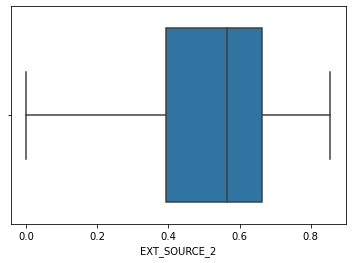

In [28]:
#Checking for any outliers in the numerical column EXT_SOURCE_2 using a box plot
sb.boxplot(data=data,x='EXT_SOURCE_2')
plt.show()

The data in this column are not highly skewed. Witn no outliers, we will replace missing values with the mean.

In [29]:
data['EXT_SOURCE_2'].fillna(value=data['EXT_SOURCE_2'].mean(),inplace=True)
data['EXT_SOURCE_2'].isna().sum()

0

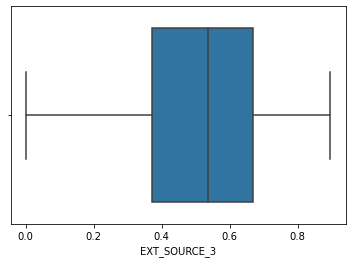

In [30]:
#Checking for any outliers in the numerical column EXT_SOURCE_3 using a box plot
sb.boxplot(data=data,x='EXT_SOURCE_3')
plt.show()

The data in this column are not highly skewed. Witn no outliers, we will replace missing values with the mean.

In [31]:
data['EXT_SOURCE_3'].fillna(value=data['EXT_SOURCE_3'].mean(),inplace=True)
data['EXT_SOURCE_3'].isna().sum()

0

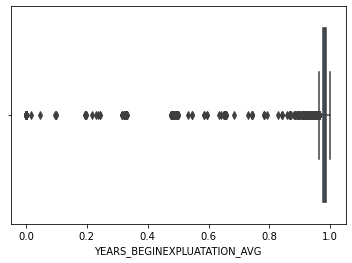

In [32]:
#Checking for any outliers in the numerical column YEARS_BEGINEXPLUATATION_AVG using a box plot
sb.boxplot(data=data,x='YEARS_BEGINEXPLUATATION_AVG')
plt.show()

The data in this column are highly skewed to the left, so we will replace missing values with the median. Note a significant amount of data are outliers. So we must proceed with caution with this features. 

In [33]:
data['YEARS_BEGINEXPLUATATION_AVG'].fillna(value=data['YEARS_BEGINEXPLUATATION_AVG'].median(),inplace=True)
data['YEARS_BEGINEXPLUATATION_AVG'].isna().sum()

0

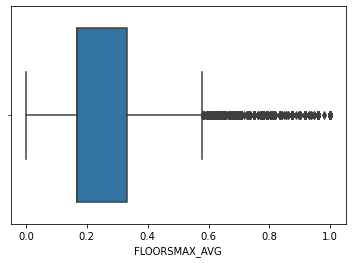

In [34]:
#Checking for any outliers in the numerical column YEARS_BEGINEXPLUATATION_AVG using a box plot
sb.boxplot(data=data,x='FLOORSMAX_AVG')
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median. Note a significant amount of data are outliers. So we must proceed with caution with this features. 

In [35]:
data['FLOORSMAX_AVG'].fillna(value=data['FLOORSMAX_AVG'].median(),inplace=True)
data['FLOORSMAX_AVG'].isna().sum()

0

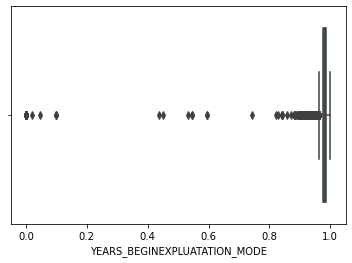

In [36]:
#Checking for any outliers in the numerical column YEARS_BEGINEXPLUATATION_AVG using a box plot
sb.boxplot(data=data,x='YEARS_BEGINEXPLUATATION_MODE')
plt.show()

The data in this column are highly skewed to the left, so we will replace missing values with the median. Note a significant amount of data are outliers. So we must proceed with caution with this features. 

In [37]:
data['YEARS_BEGINEXPLUATATION_AVG'].fillna(value=data['YEARS_BEGINEXPLUATATION_AVG'].median(),inplace=True)
data['YEARS_BEGINEXPLUATATION_AVG'].isna().sum()

0

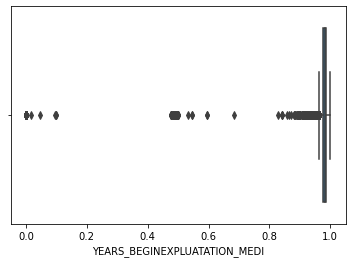

In [38]:
#Checking for any outliers in the numerical column YEARS_BEGINEXPLUATATION_MEDI using a box plot
sb.boxplot(data=data,x='YEARS_BEGINEXPLUATATION_MEDI')
plt.show()

The data in this column are highly skewed to the left, so we will replace missing values with the median.

In [39]:
data['YEARS_BEGINEXPLUATATION_MEDI'].fillna(value=data['YEARS_BEGINEXPLUATATION_MEDI'].median(),inplace=True)
data['YEARS_BEGINEXPLUATATION_MEDI'].isna().sum()

0

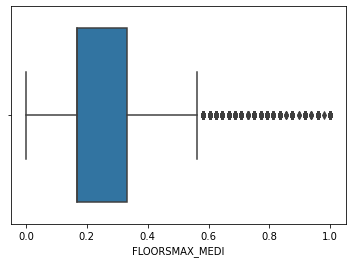

In [40]:
#Checking for any outliers in the numerical column FLOORSMAX_MEDI using a box plot
sb.boxplot(data=data,x=('FLOORSMAX_MEDI'))
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median.

In [41]:
data['FLOORSMAX_MEDI'].fillna(value=data['FLOORSMAX_MEDI'].median(),inplace=True)
data['FLOORSMAX_MEDI'].isna().sum()

0

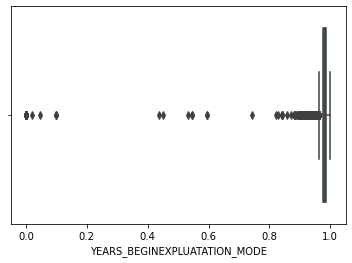

In [42]:
#Checking for any outliers in the numerical column  YEARS_BEGINEXPLUATATION_MODE using a box plot
sb.boxplot(data=data,x=('YEARS_BEGINEXPLUATATION_MODE'))
plt.show()

The data in this column are highly skewed to the left, so we will replace missing values with the median. Note a significant amount of data are outliers. So we must proceed with caution with this features. 

In [43]:
data['YEARS_BEGINEXPLUATATION_MODE'].fillna(value=data['YEARS_BEGINEXPLUATATION_MODE'].median(),inplace=True)
data['YEARS_BEGINEXPLUATATION_MODE'].isna().sum()

0

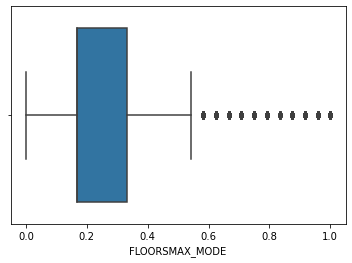

In [44]:
#Checking for any outliers in the numerical column  FLOORSMAX_MODE using a box plot
sb.boxplot(data=data,x=('FLOORSMAX_MODE'))
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median.

In [45]:
data['FLOORSMAX_MODE'].fillna(value=data['FLOORSMAX_MODE'].median(),inplace=True)
data['FLOORSMAX_MODE'].isna().sum()

0

In [46]:
#Handling missing values in the categorical variable EMERGENCYSTATE_MODE.
data['EMERGENCYSTATE_MODE'].value_counts() 

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

Since the most common category is "No", we may replace the missing values by that category.

In [47]:
no = data['EMERGENCYSTATE_MODE'].value_counts().index[0]
print(no)
data['EMERGENCYSTATE_MODE'] = data['EMERGENCYSTATE_MODE'].fillna(no)
data['EMERGENCYSTATE_MODE'].isna().sum()

No


0

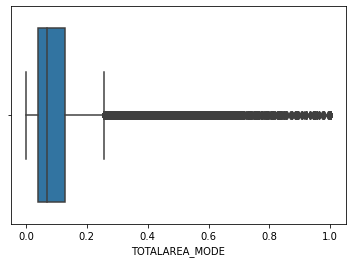

In [48]:
#Checking for any outliers in the numerical column TOTALAREA_MODE using a box plot
sb.boxplot(data=data,x=('TOTALAREA_MODE'))
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median. Note a significant amount of data are outliers. So we must proceed with caution with this features. 

In [49]:
data['TOTALAREA_MODE'].fillna(value=data['TOTALAREA_MODE'].median(),inplace=True)
data['TOTALAREA_MODE'].isna().sum()

0

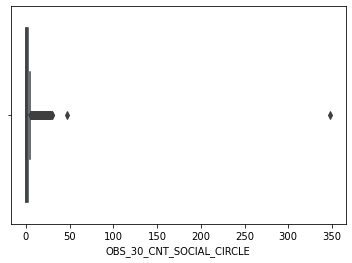

In [50]:
#Checking for any outliers in the numerical column  OBS_30_CNT_SOCIAL_CIRCLE using a box plot
sb.boxplot(data=data,x=('OBS_30_CNT_SOCIAL_CIRCLE'))
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median.

In [51]:
data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=data['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
data['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

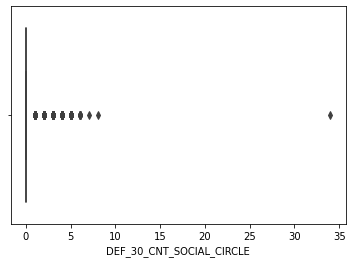

In [52]:
#Checking for any outliers in the numerical column DEF_30_CNT_SOCIAL_CIRCLE using a box plot
sb.boxplot(data=data,x=('DEF_30_CNT_SOCIAL_CIRCLE'))
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median.

In [53]:
data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=data['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
data['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

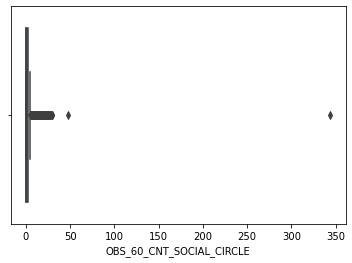

In [54]:
#Checking for any outliers in the numerical column OBS_60_CNT_SOCIAL_CIRCLE using a box plot
sb.boxplot(data=data,x=('OBS_60_CNT_SOCIAL_CIRCLE'))
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median.

In [55]:
data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=data['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
data['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

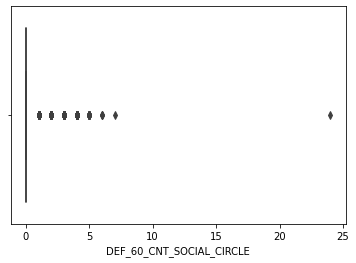

In [56]:
#Checking for any outliers in the numerical column DEF_60_CNT_SOCIAL_CIRCLE using a box plot
sb.boxplot(data=data,x=('DEF_60_CNT_SOCIAL_CIRCLE'))
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median.

In [57]:
data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=data['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
data['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

0

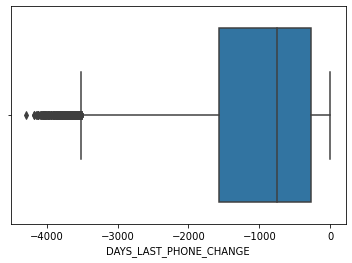

In [58]:
#Checking for any outliers in the numerical column DAYS_LAST_PHONE_CHANGE using a box plot
sb.boxplot(data=data,x=('DAYS_LAST_PHONE_CHANGE'))
plt.show()

The data in this column are highly skewed to the left, so we will replace missing values with the median.

In [59]:
data['DAYS_LAST_PHONE_CHANGE'].fillna(value=data['DAYS_LAST_PHONE_CHANGE'].median(),inplace=True)
data['DAYS_LAST_PHONE_CHANGE'].isna().sum()

0

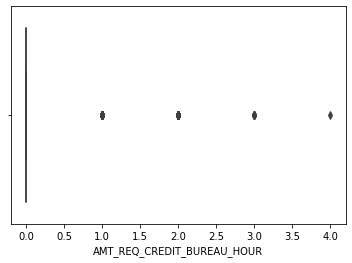

In [60]:
#Checking for any outliers in the numerical column AMT_REQ_CREDIT_BUREAU_HOUR using a box plot
sb.boxplot(data=data,x=('AMT_REQ_CREDIT_BUREAU_HOUR'))
plt.show()

The data in this column are skewed to the right, so we will replace missing values with the median.

In [61]:
data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=data['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)
data['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

0

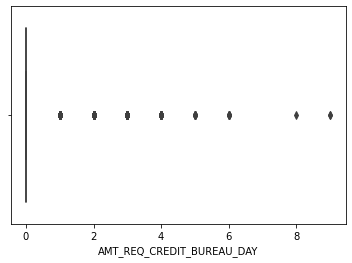

In [62]:
#Checking for any outliers in the numerical column AMT_REQ_CREDIT_BUREAU_DAY using a box plot
sb.boxplot(data=data,x=('AMT_REQ_CREDIT_BUREAU_DAY'))
plt.show()

The data in this column are  skewed to the right, so we will replace missing values with the median.

In [63]:
data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=data['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)
data['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()

0

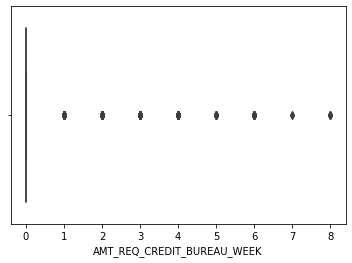

In [64]:
#Checking for any outliers in the numerical column AMT_REQ_CREDIT_BUREAU_WEEK using a box plot
sb.boxplot(data=data,x=('AMT_REQ_CREDIT_BUREAU_WEEK'))
plt.show()

The data in this column are skewed to the right, so we will replace missing values with the median.

In [65]:
data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=data['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)
data['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

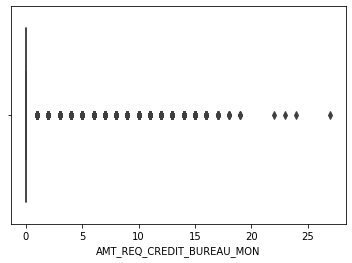

In [66]:
#Checking for any outliers in the numerical column AMT_REQ_CREDIT_BUREAU_MON using a box plot
sb.boxplot(data=data,x=('AMT_REQ_CREDIT_BUREAU_MON'))
plt.show()

The data in this column are skewed to the right, so we will replace missing values with the median.

In [67]:
data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=data['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)
data['AMT_REQ_CREDIT_BUREAU_MON'].isna().sum()

0

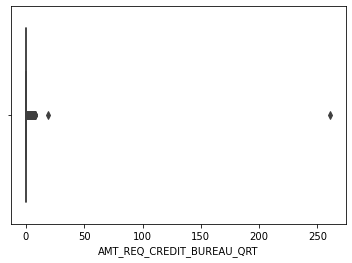

In [68]:
#Checking for any outliers in the numerical column AMT_REQ_CREDIT_BUREAU_QRT using a box plot
sb.boxplot(data=data,x=('AMT_REQ_CREDIT_BUREAU_QRT'))
plt.show()

The data in this column are skewed to the right, so we will replace missing values with the median.

In [69]:
data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=data['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)
data['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

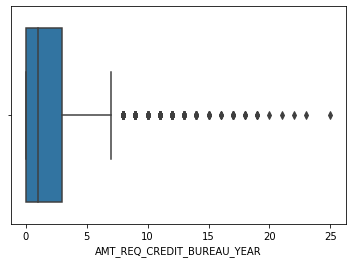

In [70]:
#Checking for any outliers in the numerical column AMT_REQ_CREDIT_BUREAU_DAY using a box plot
sb.boxplot(data=data,x=('AMT_REQ_CREDIT_BUREAU_YEAR'))
plt.show()

The data in this column are highly skewed to the right, so we will replace missing values with the median.

In [71]:
data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)
data['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

In [72]:
data.isnull().sum().info()

<class 'pandas.core.series.Series'>
Index: 55 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
Series name: None
Non-Null Count  Dtype
--------------  -----
55 non-null     int64
dtypes: int64(1)
memory usage: 880.0+ bytes


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

Encoding categorical variables of the data

In [74]:
#Checking the distribution of all categorical data to perform encoding
print(data.NAME_CONTRACT_TYPE.value_counts())
print(data.CODE_GENDER.value_counts())
print(data.FLAG_OWN_CAR.value_counts())
print(data.FLAG_OWN_REALTY.value_counts())
print(data.NAME_TYPE_SUITE.value_counts())
print(data.NAME_INCOME_TYPE.value_counts())
print(data.NAME_EDUCATION_TYPE.value_counts())
print(data.NAME_FAMILY_STATUS.value_counts())
print(data.NAME_HOUSING_TYPE.value_counts())
print(data.OCCUPATION_TYPE.value_counts())
print(data.WEEKDAY_APPR_PROCESS_START.value_counts())
print(data.ORGANIZATION_TYPE.value_counts())
print(data.EMERGENCYSTATE_MODE.value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUC

Since in the CODE_GENDER column,  there are just 4 rows including 'XNA' values, we will replace them by the majority which is 'F'. 

In [75]:
data.loc[data['CODE_GENDER']=='XNA','CODE_GENDER']='F'

Since in the ORGANIZATION_TYPE column,  there are just rows including 'XNA' values, we will replace them by the Laborers OCCUPATION_TYPE category since as seen below, the typically fall in that category.

In [76]:
data[data['ORGANIZATION_TYPE']=='XNA']['OCCUPATION_TYPE'].head(300)

8       Laborers
11      Laborers
23      Laborers
38      Laborers
43      Laborers
46      Laborers
54      Laborers
56      Laborers
62      Laborers
79      Laborers
81      Laborers
84      Laborers
99      Laborers
105     Laborers
106     Laborers
108     Laborers
117     Laborers
118     Laborers
125     Laborers
140     Laborers
143     Laborers
156     Laborers
157     Laborers
158     Laborers
173     Laborers
174     Laborers
175     Laborers
185     Laborers
213     Laborers
220     Laborers
222     Laborers
226     Laborers
227     Laborers
233     Laborers
237     Laborers
239     Laborers
240     Laborers
247     Laborers
252     Laborers
263     Laborers
270     Laborers
283     Laborers
287     Laborers
290     Laborers
302     Laborers
304     Laborers
305     Laborers
306     Laborers
318     Laborers
322     Laborers
324     Laborers
342     Laborers
344     Laborers
347     Laborers
348     Laborers
349     Laborers
352     Laborers
359     Laborers
364     Labore

In [77]:
data['ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].replace('XNA','Laborers')

## 4. Data Visiualization

In [78]:
features_object = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']

In [79]:
list(enumerate(features_object))

[(0, 'NAME_CONTRACT_TYPE'),
 (1, 'CODE_GENDER'),
 (2, 'FLAG_OWN_CAR'),
 (3, 'FLAG_OWN_REALTY'),
 (4, 'NAME_TYPE_SUITE'),
 (5, 'NAME_INCOME_TYPE'),
 (6, 'NAME_EDUCATION_TYPE'),
 (7, 'NAME_FAMILY_STATUS'),
 (8, 'NAME_HOUSING_TYPE'),
 (9, 'OCCUPATION_TYPE'),
 (10, 'WEEKDAY_APPR_PROCESS_START'),
 (11, 'ORGANIZATION_TYPE'),
 (12, 'EMERGENCYSTATE_MODE')]

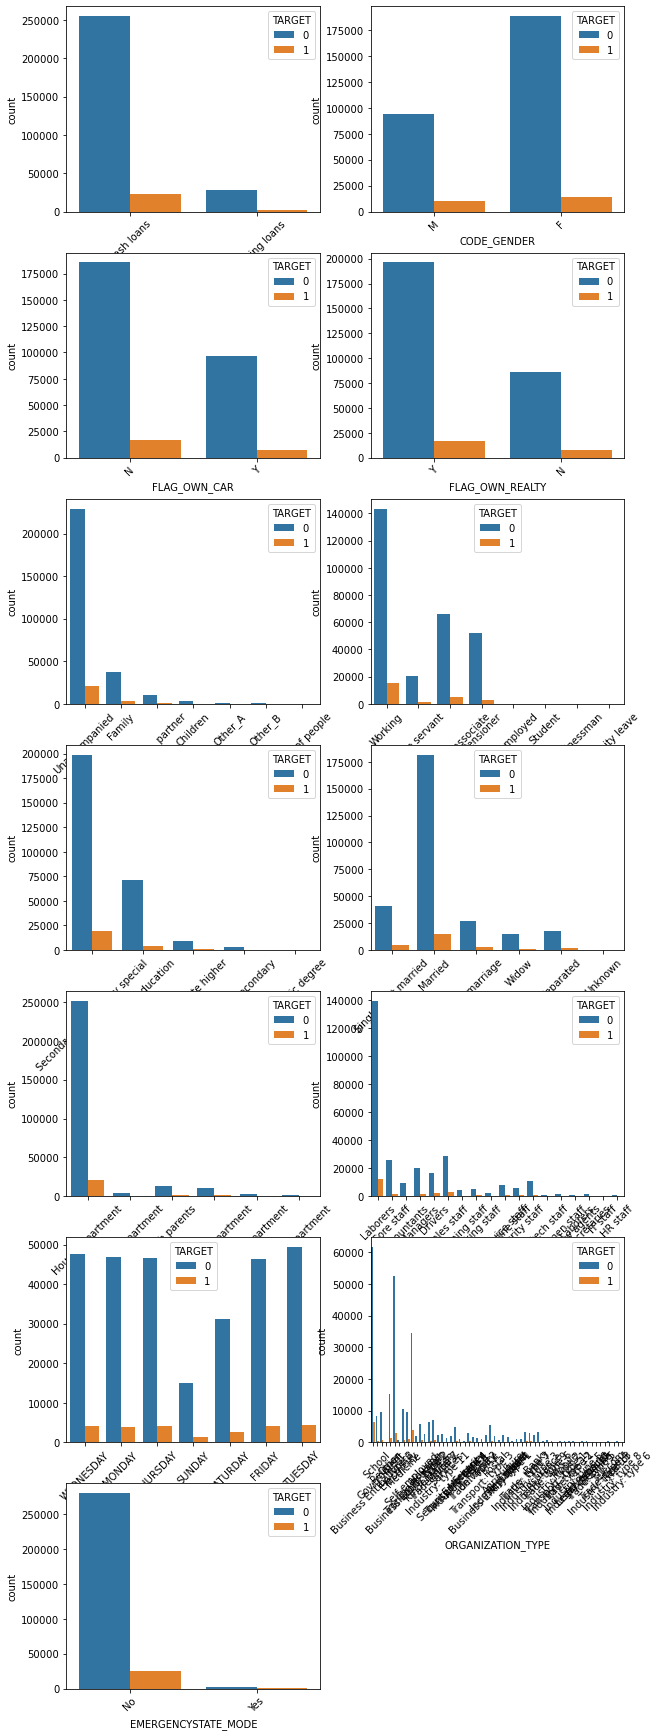

In [80]:
plt.figure(figsize =(10,40))
for i in enumerate(features_object):
    plt.subplot(9, 2, i[0]+1)
    sb.countplot(x=i[1], hue ='TARGET', data=data)
    plt.xticks(rotation =45)

We can conclude that there is little to know association between TARGET and the variables CODE_GENDER, WEEKDAY_APPR_PROCESS_START. So we are not going to use those variables as predictors. those two variables 

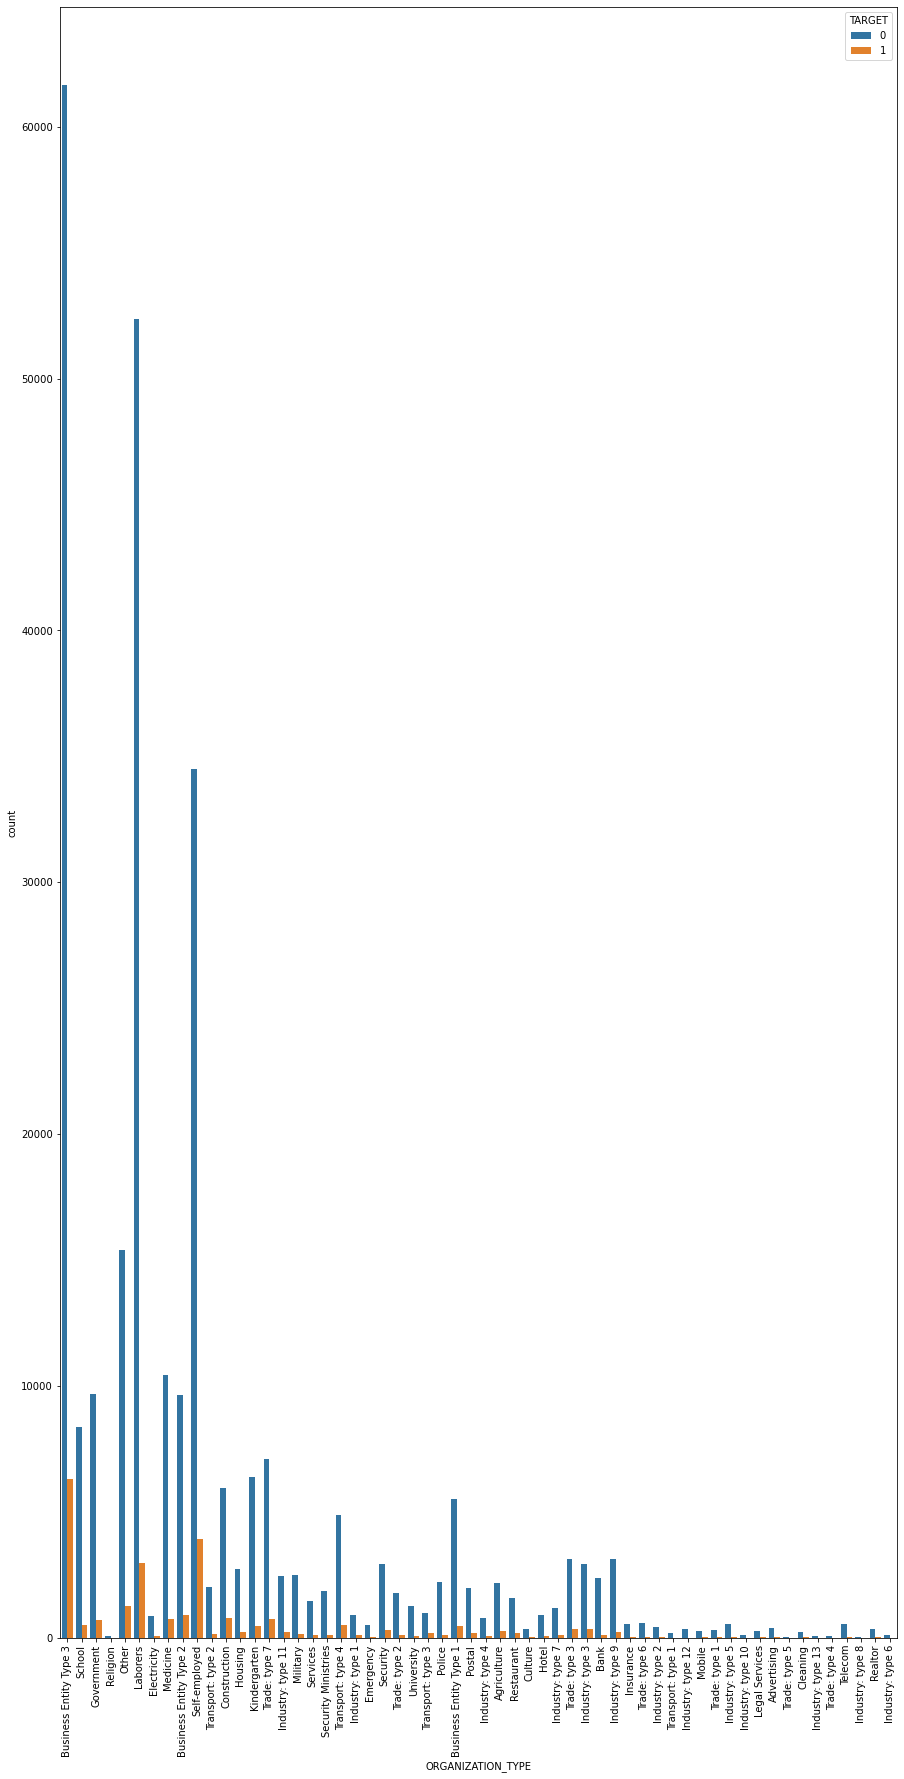

In [81]:
#Checking correlations between Education and Loan_Status variables
plt.figure(figsize =(15,30))
sb.countplot(x ='ORGANIZATION_TYPE', hue ='TARGET', data=data)
plt.xticks(rotation =90)
plt.show()

In [82]:
Z = pd.get_dummies(data)
print(Z)

        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  ...  ORGANIZATION_TYPE_Trade: type 5  ORGANIZATION_TYPE_Trade: type 6  ORGANIZATION_TYPE_Trade: type 7  ORGANIZATION_TYPE_Transport: type 1  ORGANIZATION_TYPE_Transport: type 2  ORGANIZATION_TYPE_Transport: type 3  ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes
0           100002       1             0          202500.0    406597.5      24700.5         351000.0                    0.018801       -9461           -637  ...                                0                                0                                0                                    0                                    0                                    0                                    0                             0                       1                        0
1           100003       0

## 5. Visualization of the data

#### 5.1 Univariate Plots

###### Histograms of the Quantitative Variables

#### 5.2 Multivariate Plots

##### Side-by-Side Bar Graphs, Correlation Matrix plot and HeatMap

In [83]:
#Encoding the categorical variables
#Convert test to numerical values
data.replace({'NAME_CONTRACT_TYPE':{'Cash loans':0,'Revolving loans':1}},inplace=True)
data.replace({'CODE_GENDER':{'F':0,'M':1}},inplace=True)
data.replace({'FLAG_OWN_CAR':{'N':0,'Y':1}}, inplace=True)
data.replace({'FLAG_OWN_REALTY':{'Y':0,'Diesel':1}},inplace=True)
data.replace({'NAME_TYPE_SUITE':{'Unaccompanied':0,'Family':1,'Spouse, partner':2,'Children':3,'Other_B':4,'Other_A':5,'Group of people':6}},inplace=True)
data.replace({'NAME_INCOME_TYPE':{'Working':0,'Commercial associate':1,'Pensioner':2,'State servant':3,'Unemployed':4,'Student':5,'Businessman':6,'Maternity leave':7}},inplace=True)

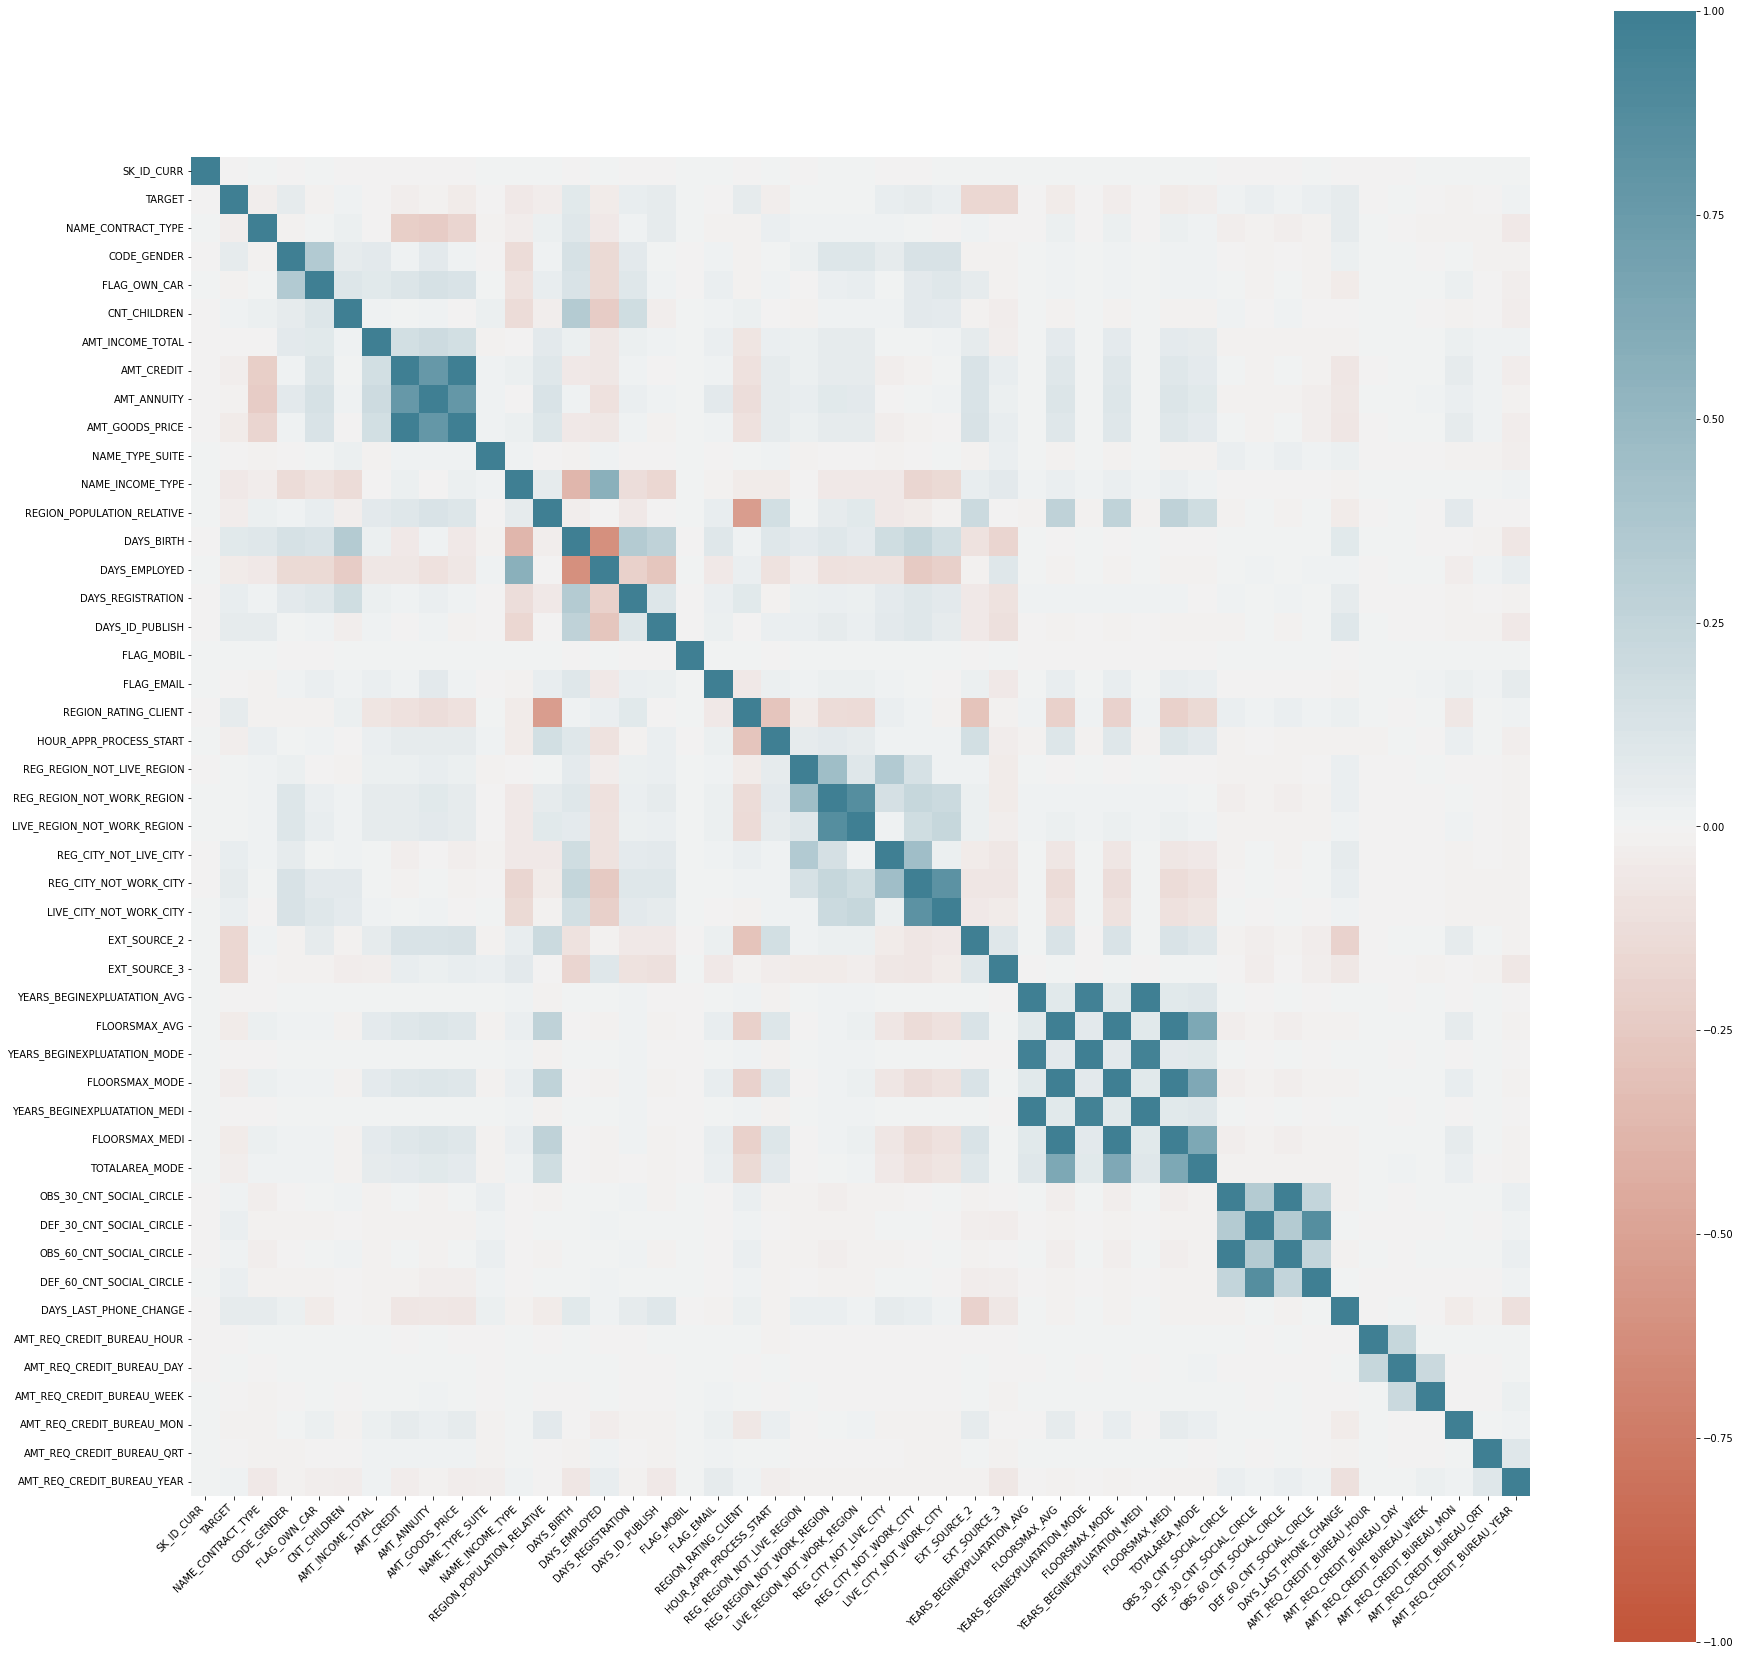

In [84]:
plt.figure(figsize=(30,30))
corr = data.corr()
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [85]:
c1 = round(corr.abs().unstack(),8)
c1.sort_values(ascending = False)

SK_ID_CURR                  SK_ID_CURR                    1.000000
REG_CITY_NOT_LIVE_CITY      REG_CITY_NOT_LIVE_CITY        1.000000
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_LIVE_REGION    1.000000
HOUR_APPR_PROCESS_START     HOUR_APPR_PROCESS_START       1.000000
REGION_RATING_CLIENT        REGION_RATING_CLIENT          1.000000
                                                            ...   
SK_ID_CURR                  LIVE_CITY_NOT_WORK_CITY       0.000067
EXT_SOURCE_2                FLAG_MOBIL                    0.000000
FLAG_MOBIL                  EXT_SOURCE_3                  0.000000
EXT_SOURCE_3                FLAG_MOBIL                    0.000000
FLAG_MOBIL                  EXT_SOURCE_2                  0.000000
Length: 2209, dtype: float64

In [86]:
pd.set_option("display.precision",2)
data.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.00e+00,-2.11e-03,1.65e-03,-7.28e-04,1.22e-03,-1.13e-03,-1.82e-03,-3.43e-04,-4.31e-04,-2.58e-04,...,-8.54e-05,-1.43e-03,1.18e-03,-8.59e-04,-2.52e-03,-2.07e-03,1.88e-03,3.28e-04,8.09e-04,4.07e-03
TARGET,-2.11e-03,1.00e+00,-3.09e-02,5.47e-02,-2.19e-02,1.92e-02,-3.98e-03,-3.04e-02,-1.28e-02,-3.96e-02,...,3.24e-02,9.34e-03,3.14e-02,5.52e-02,-7.36e-05,1.70e-03,-1.31e-03,-1.48e-02,-5.83e-03,1.22e-02
NAME_CONTRACT_TYPE,1.65e-03,-3.09e-02,1.00e+00,-8.78e-03,4.02e-03,3.00e-02,-3.53e-03,-2.22e-01,-2.42e-01,-1.86e-01,...,-1.18e-02,-2.49e-02,-9.27e-03,6.18e-02,1.21e-04,-4.98e-03,-1.48e-02,-1.43e-02,-2.14e-02,-4.96e-02
CODE_GENDER,-7.28e-04,5.47e-02,-8.78e-03,1.00e+00,3.46e-01,4.74e-02,7.47e-02,2.16e-02,7.70e-02,2.25e-02,...,-1.80e-02,-7.24e-03,-1.48e-02,2.53e-02,2.30e-03,5.23e-04,-2.86e-03,5.77e-03,-9.68e-03,-2.07e-02
FLAG_OWN_CAR,1.22e-03,-2.19e-02,4.02e-03,3.46e-01,1.00e+00,1.02e-01,8.34e-02,1.16e-01,1.42e-01,1.20e-01,...,-1.52e-02,3.13e-03,-1.55e-02,-3.91e-02,3.68e-03,1.51e-03,2.82e-03,2.35e-02,-4.08e-03,-2.61e-02
CNT_CHILDREN,-1.13e-03,1.92e-02,3.00e-02,4.74e-02,1.02e-01,1.00e+00,1.29e-02,2.15e-03,2.14e-02,-1.86e-03,...,-1.20e-03,1.53e-02,-1.81e-03,-5.87e-03,1.59e-04,1.07e-04,-1.08e-03,-7.98e-03,-4.91e-03,-3.49e-02
AMT_INCOME_TOTAL,-1.82e-03,-3.98e-03,-3.53e-03,7.47e-02,8.34e-02,1.29e-02,1.00e+00,1.57e-01,1.92e-01,1.60e-01,...,-1.35e-02,-1.34e-02,-1.33e-02,-1.86e-02,1.43e-03,3.48e-03,3.95e-03,2.67e-02,7.92e-03,1.58e-02
AMT_CREDIT,-3.43e-04,-3.04e-02,-2.22e-01,2.16e-02,1.16e-01,2.15e-03,1.57e-01,1.00e+00,7.70e-01,9.87e-01,...,-2.08e-02,9.42e-04,-2.34e-02,-7.37e-02,-2.37e-03,5.03e-03,1.63e-03,5.55e-02,2.04e-02,-3.66e-02
AMT_ANNUITY,-4.31e-04,-1.28e-02,-2.42e-01,7.70e-02,1.42e-01,2.14e-02,1.92e-01,7.70e-01,1.00e+00,7.75e-01,...,-2.24e-02,-1.11e-02,-2.37e-02,-6.37e-02,3.89e-03,2.29e-03,1.35e-02,3.72e-02,1.07e-02,-8.29e-03
AMT_GOODS_PRICE,-2.58e-04,-3.96e-02,-1.86e-01,2.25e-02,1.20e-01,-1.86e-03,1.60e-01,9.87e-01,7.75e-01,1.00e+00,...,-2.19e-02,8.06e-04,-2.42e-02,-7.63e-02,-1.74e-03,5.44e-03,1.88e-03,5.73e-02,2.08e-02,-3.90e-02


Independent variables are not correlated.

### 6. FEATURE ENGENIERING

##### Creating Dependent And Independent Variables

In [87]:
X = Z.drop(columns={'SK_ID_CURR','TARGET'}, axis=1) #axis=1 for removing columns and axis=1 for rows
y = Z['TARGET']
print(X)
print(y)

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  ...  ORGANIZATION_TYPE_Trade: type 5  ORGANIZATION_TYPE_Trade: type 6  ORGANIZATION_TYPE_Trade: type 7  ORGANIZATION_TYPE_Transport: type 1  ORGANIZATION_TYPE_Transport: type 2  ORGANIZATION_TYPE_Transport: type 3  ORGANIZATION_TYPE_Transport: type 4  ORGANIZATION_TYPE_University  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes
0                  0          202500.0    4.07e+05      24700.5         3.51e+05                    1.88e-02       -9461           -637            -3648.0            -2120  ...                                0                                0                                0                                    0                                    0                                    0                                    0                             0                       1                    

In [88]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,202500.0,4.07e+05,24700.5,3.51e+05,1.88e-02,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,0,0,0,1,0
1,0,270000.0,1.29e+06,35698.5,1.13e+06,3.54e-03,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,0,1,0
2,0,67500.0,1.35e+05,6750.0,1.35e+05,1.00e-02,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,0,1,0
3,0,135000.0,3.13e+05,29686.5,2.97e+05,8.02e-03,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,0,1,0
4,0,121500.0,5.13e+05,21865.5,5.13e+05,2.87e-02,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,0,1,0


##### Standardizing Data

In [89]:
#using the function StandarScaler that we imported to  standardize the data in a common range  for a better prediction.
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [90]:
X_standardized_data=scaler.fit_transform(X)

In [91]:
X = pd.DataFrame(X_standardized_data, columns=X.columns, index=X.index)


### Split Dataset to Train and Test

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, stratify=y, random_state=2)

In [93]:
print(X.shape, X_train.shape, X_test.shape)

(307511, 165) (276759, 165) (30752, 165)


## 7. Building Models

#### 7.1 Logistic Regression

Training Accuracy    : 91.93 %
Model Accuracy Score : 91.93 %
--------------------------------------------------------


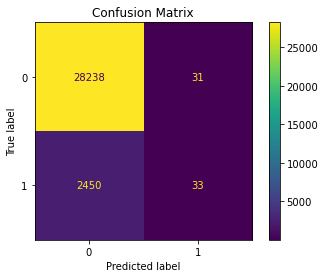

In [94]:
# Logistic Regression
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()  
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

#### 7.2 Decision Tree Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 84.92 %
--------------------------------------------------------


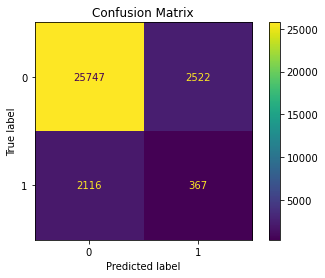

In [95]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

#### 7.3 KNeighbors Classifier


Training Accuracy    : 92.2 %
Model Accuracy Score : 91.47 %
--------------------------------------------------------


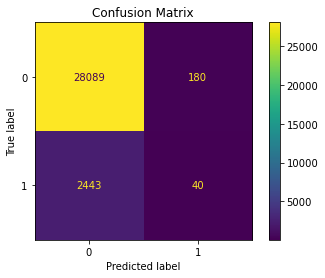

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(knn, X_test, y_test);
plt.title('Confusion Matrix');

#### 7.4 AdaBoost Classifier

Training Accuracy    : 91.92 %
Model Accuracy Score : 91.9 %
--------------------------------------------------------


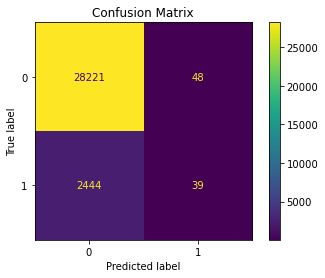

In [97]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred_ada, y_test) * 100, 2)

print("Training Accuracy    :",ada_train ,"%")
print("Model Accuracy Score :",ada_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(ada, X_test, y_test);
plt.title('Confusion Matrix');

#### 7.5 Gradient Boosting Classifier

Training Accuracy    : 91.97 %
Model Accuracy Score : 91.95 %
--------------------------------------------------------


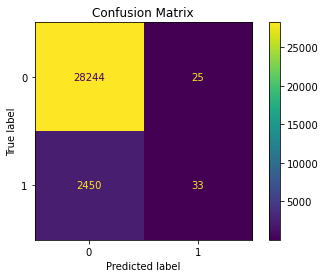

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)


gbc_train = round(gbc.score(X_train, y_train) * 100, 2)
gbc_accuracy = round(accuracy_score(y_pred_gbc, y_test) * 100, 2)

print("Training Accuracy    :",gbc_train ,"%")
print("Model Accuracy Score :",gbc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(gbc, X_test, y_test);
plt.title('Confusion Matrix');

#### 7.6 Bagging Classifier

Training Accuracy    : 98.59 %
Model Accuracy Score : 91.74 %
--------------------------------------------------------


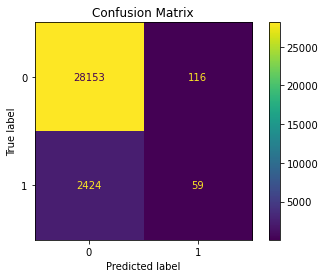

In [99]:
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier()
Bag.fit(X_train,y_train)
y_pred_Bag = Bag.predict(X_test)


Bag_train = round(Bag.score(X_train, y_train) * 100, 2)
Bag_accuracy = round(accuracy_score(y_pred_Bag, y_test) * 100, 2)

print("Training Accuracy    :",Bag_train ,"%")
print("Model Accuracy Score :",Bag_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(Bag, X_test, y_test);
plt.title('Confusion Matrix');

#### 7.7 Random Forest classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 91.94 %
--------------------------------------------------------


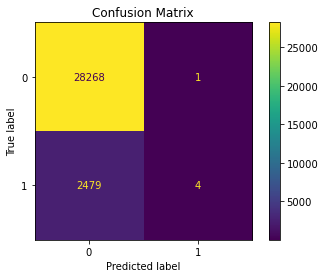

In [100]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

## 8. Model Comparison

#### Comparison Table

In [101]:
Models = pd.DataFrame({
    'Model': [
        'Logistic Regression','Decision Tree','KNN', 'AdaBoostClassifier', 'GradientBoostingClassifier',
        'BaggingClassifier','RandomForestClassifier'
        
    ],
    
    'Model Accuracy Score (%)': [
        log_accuracy, decision_accuracy, knn_accuracy,ada_accuracy,gbc_accuracy, 
       Bag_accuracy, random_forest_accuracy
    ]
})

In [102]:
pd.set_option("display.precision",2)

Models.sort_values(by='Model Accuracy Score (%)', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Model Accuracy Score (%)
GradientBoostingClassifier,91.950000
RandomForestClassifier,91.940000
Logistic Regression,91.930000
AdaBoostClassifier,91.900000
BaggingClassifier,91.740000
KNN,91.470000
Decision Tree,84.920000


## 9. Using the Best Model for Predictions

The Gradient Boosting Classifier appears to be the best model. We will use it to make prediction.

In [116]:
#Input data as a numpy array
Input_data = X.sample(1)
#changing to numpy array
Input_data = np.asarray(Input_data)
#reshape the array as we are predicting for one instance
Input_data=Input_data.reshape(1,-1)
#Standardize the input data
std_data = scaler.transform(Input_data)
print(std_data)
prediction =gbc.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('CONCLUSION: The client will default')
else:
    print('CONCLUSION: The client will not default')

[[-1.37731859e+00 -7.11858181e-01 -1.48829270e+00 -1.87030456e+00
  -1.45770491e+00  2.09470908e+01  3.67486425e+00 -4.51709732e-01
   1.41548020e+00  1.98475381e+00 -5.53535839e+02 -1.30534577e+00
  -4.23455296e+00 -3.79353810e+00 -1.13938127e+00 -1.28475088e+00
  -1.24825055e+00 -1.37600990e+00 -1.84670223e+00 -1.68666423e+00
  -1.21381501e+01  1.41427628e+00 -2.00447699e+01  1.01486745e+01
  -1.84446048e+01  1.05938004e+01 -1.98586752e+01  1.01184637e+01
  -1.48731412e+01 -8.37458805e-01 -1.03899519e+00 -8.37033403e-01
  -1.03772347e+00  1.16324802e+00 -9.80919261e-01 -6.29104906e-01
  -9.72905722e-01  7.77166048e-01 -7.23398660e-01 -1.57788851e+00
  -1.97742620e+00 -1.42962764e+00  1.30757290e-01 -2.23930285e+00
   1.22474465e-01 -2.23331340e+00 -2.10613337e+00 -6.32178297e-02
  -1.11436286e+00 -1.53768130e+00 -1.03058132e+00 -1.05596649e+00
  -1.08187610e+00 -1.23433742e+00 -8.49955525e-01 -1.00573517e+00
   3.74282940e+00 -1.00404861e+00 -1.68813366e+00 -1.35149973e+00
  -1.00770